#Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [65]:
##importing the required libraries for Analysis

import pandas as pd
import numpy as np
from numpy import sqrt

from pandas import Grouper
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose
## with the help of this we will be able to creat graphs for the dfferent components of time series data 
#like trends, level, sesional components and residual data

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
##Loading the dataset
df = pd.read_excel('/content/Airlines+Data.xlsx',header=0,parse_dates=True)

In [3]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
df.set_index('Month',inplace=True)
## making the month column as index

In [6]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [8]:
df.index.year


Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [9]:
df.isnull().sum().sum()
## no nan values in the data set

0

In [10]:
df[df.duplicated()].shape
#found the 16 duplicated rows

(16, 1)

In [11]:
df[df.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [12]:
df.drop_duplicates(inplace=True)
## removed the duplicated

In [13]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [15]:
DF = df.copy()
## copied the data from df to DF so that any changes done to coppied data does not reflect to original data

In [16]:
DF

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [25]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 1995-01-01 to 2002-11-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [26]:
DF.ndim

2

In [28]:
DF.isnull().sum().sum()

0

In [17]:
## Visualization of Data Checking the line plot,Histogram and Density Plots,create a density plot,
## Box and Whisker Plots by Interval,Lag Plot, Autocorrelation Plot

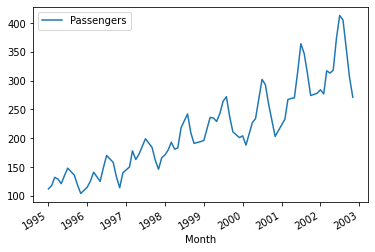

In [18]:
DF.plot()
plt.show()

In [ ]:
## here we can say that the trend is upward and the sessionality is multiplicative 

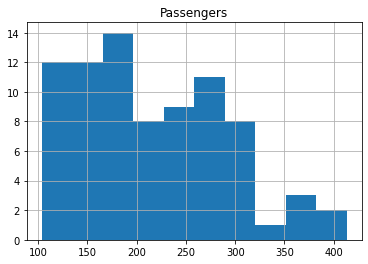

In [19]:
##Histogram and Density Plots

DF.hist()
plt.show()

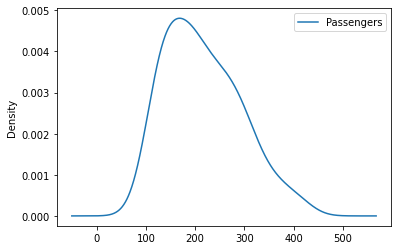

In [20]:
# create a density plot
DF.plot(kind='kde')
plt.show()

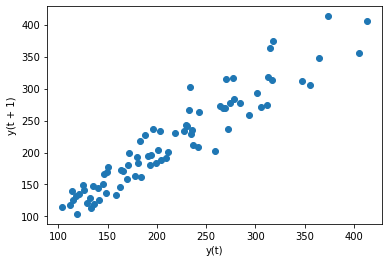

In [30]:
##Lag_plot
lag_plot(DF)
plt.show()

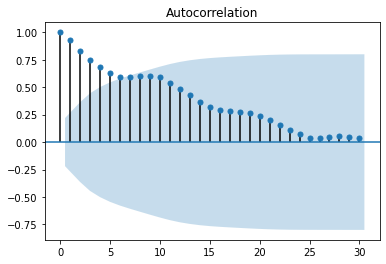

In [31]:
#Autocorrelation Plot

plot_acf(DF,lags=30)
plt.show()

# UpSampling

In [32]:
upsampled = DF.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN
1997-07-31       199.0
1997-08-31         NaN


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


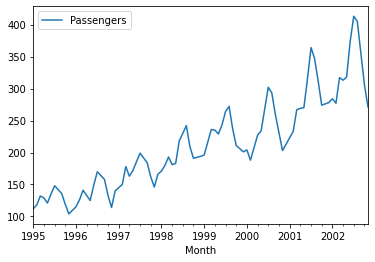

In [33]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [34]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


# Tranformations

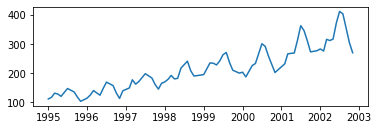

In [35]:
# line plot
plt.subplot(211)
plt.plot(DF)

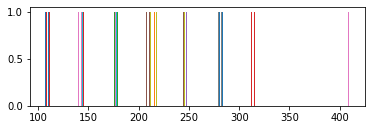

In [36]:
# histogram
plt.subplot(212)
plt.hist(DF)
plt.show()

# Square Root Transform

In [39]:
dataframe = DataFrame(DF.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

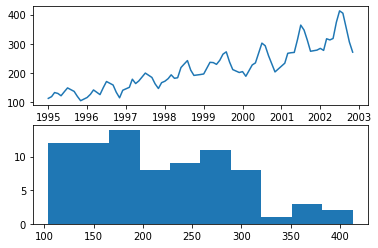

In [44]:
# line plot
plt.subplot(211)
plt.plot(DF['Passengers'])
# histogram
plt.subplot(212)
plt.hist(DF['Passengers'])
plt.show()

# Log Transform

In [41]:
from numpy import log
## importing the log library

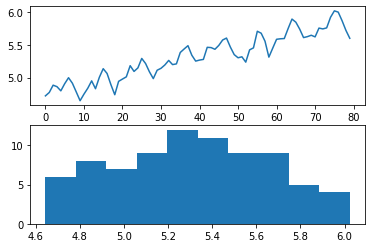

In [45]:
dataframe = DataFrame(DF.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [51]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

# Moving Average

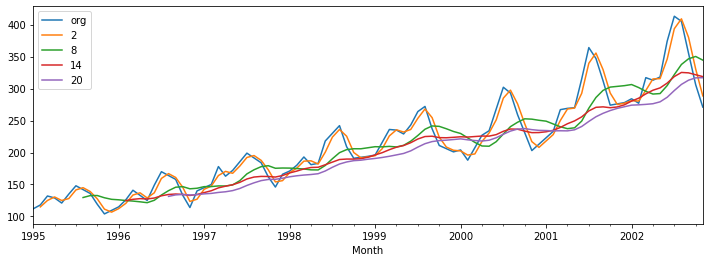

In [52]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

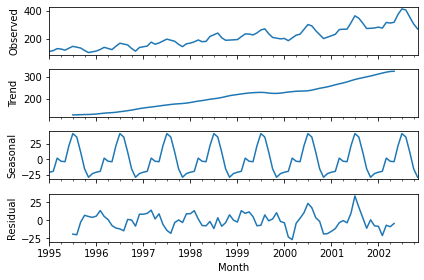

In [53]:
decompose_ts_add = seasonal_decompose(interpolated.Passengers,freq=12)  
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

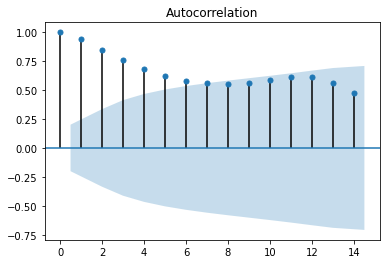

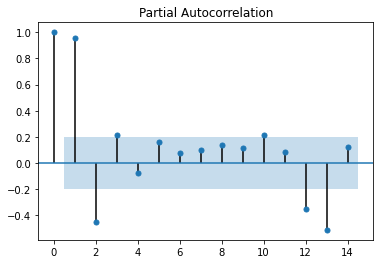

In [54]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()


# Evaluation Metric MAPE

In [62]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [56]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 


11.181638722453004

# Holt method

In [58]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

12.248038050026107

# Holts winter exponential smoothing with additive seasonality and additive trend

In [59]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

7.649281750008564

#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [60]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

5.360280104297239

In [66]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

20.583713685222417

# Final Model by combining train and test

In [67]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [68]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

2002-12-31    272.905328
2003-01-31    280.764970
2003-02-28    278.356840
2003-03-31    270.568755
2003-04-30    261.492276
2003-05-31    256.795770
2003-06-30    256.344546
2003-07-31    253.596048
2003-08-31    260.534783
2003-09-30    262.088471
Freq: M, dtype: float64

In [69]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [70]:
interpolated.reset_index(inplace=True)

In [71]:
interpolated['t'] = 1

In [72]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
90,2002-07-31,413.0,1
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1


In [73]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [74]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


In [75]:
interpolated['t_sq'] = (interpolated['t'])**2
## inserted t_sq column with values

In [76]:
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
90,2002-07-31,413.0,91,8281
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836


In [79]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # month extraction

In [80]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [81]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column

In [82]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [83]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
## storing the months as serial wise again in months variable

In [84]:
Airlines = pd.concat([interpolated,months],axis=1)


In [85]:
Airlines.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])

In [88]:
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


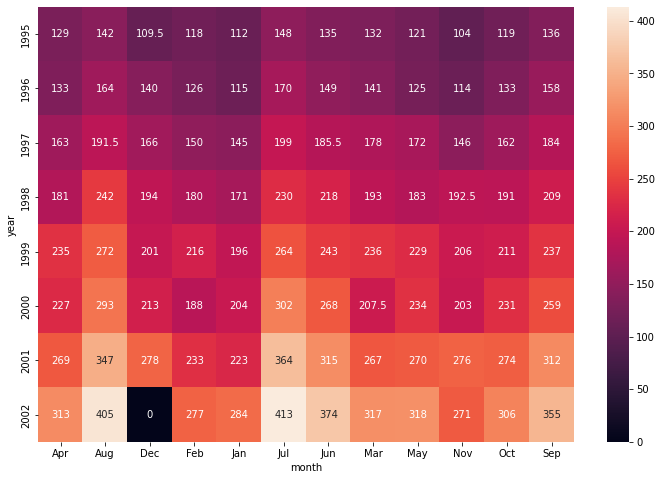

In [89]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

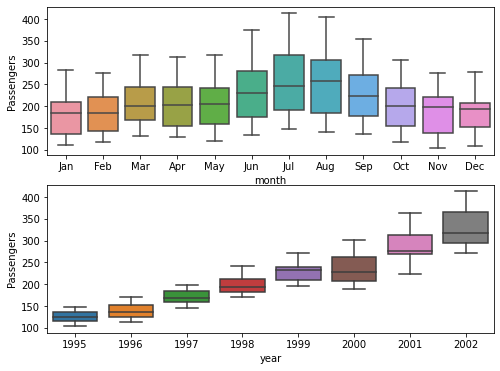

In [90]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

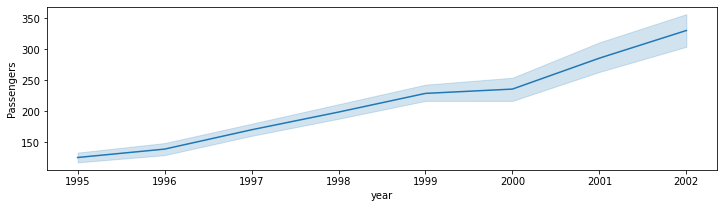

In [92]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

#Splitting data

In [93]:
Train = Airlines.head(81) # training data
Test = Airlines.tail(14) # test Data

In [94]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.87107195088719

In [95]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.37179623821826

In [96]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.70987042515198

In [97]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.5576238860141

In [98]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.78537191152257

In [99]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.2859617591716

In [100]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

13.18807073026469

In [101]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


#Predict for new time period

In [102]:
predict_data = pd.read_excel('/content/Predict_new_air.xlsx')

In [103]:
predict_data

,Date,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_sq
0,2003-01-01,0,1,0,0,0,0,0,0,0,0,0,0,97,9409
1,2003-02-01,0,0,1,0,0,0,0,0,0,0,0,0,98,9604
2,2003-03-01,0,0,1,0,0,0,0,0,0,0,0,0,99,9801
3,2003-04-01,0,0,0,1,0,0,0,0,0,0,0,0,100,10000
4,2003-05-01,0,0,0,0,1,0,0,0,0,0,0,0,101,10201
5,2003-06-01,0,0,0,0,0,1,0,0,0,0,0,0,102,10404
6,2003-07-01,0,0,0,0,0,0,1,0,0,0,0,0,103,10609
7,2003-08-01,0,0,0,0,0,0,0,1,0,0,0,0,104,10816
8,2003-09-01,0,0,0,0,0,0,0,0,1,0,0,0,105,11025
9,2003-10-01,0,0,0,0,0,0,0,0,0,1,0,0,106,11236


In [104]:
#Build the model on entire data set
model_full = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Airlines).fit()

In [105]:
model_full

In [106]:
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new = np.exp(pred_new) 
#since this model gives us the log value we have to the take the exponent to give us the forecasted value

In [107]:
pred_new

0     325.605454
1     364.450467
2     368.556048
3     361.227615
4     358.497521
5     406.802480
6     449.235264
7     442.034827
8     403.735144
9     355.412167
10    324.917344
11    348.281169
dtype: float64

In [108]:
predict_data["forecasted_passengers"] = pd.Series(pred_new)

In [109]:
predict_data

,Date,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_sq,forecasted_passengers
0,2003-01-01,0,1,0,0,0,0,0,0,0,0,0,0,97,9409,325.605454
1,2003-02-01,0,0,1,0,0,0,0,0,0,0,0,0,98,9604,364.450467
2,2003-03-01,0,0,1,0,0,0,0,0,0,0,0,0,99,9801,368.556048
3,2003-04-01,0,0,0,1,0,0,0,0,0,0,0,0,100,10000,361.227615
4,2003-05-01,0,0,0,0,1,0,0,0,0,0,0,0,101,10201,358.497521
5,2003-06-01,0,0,0,0,0,1,0,0,0,0,0,0,102,10404,406.802480
6,2003-07-01,0,0,0,0,0,0,1,0,0,0,0,0,103,10609,449.235264
7,2003-08-01,0,0,0,0,0,0,0,1,0,0,0,0,104,10816,442.034827
8,2003-09-01,0,0,0,0,0,0,0,0,1,0,0,0,105,11025,403.735144
9,2003-10-01,0,0,0,0,0,0,0,0,0,1,0,0,106,11236,355.412167


In [110]:
new_var = pd.concat([interpolated,predict_data])

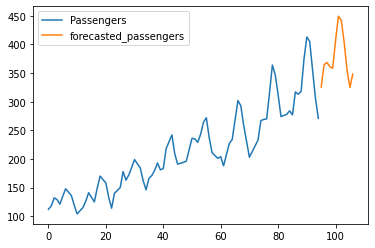

In [111]:
new_var[['Passengers','forecasted_passengers']].reset_index(drop=True).plot()

In [112]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [113]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       95 non-null     datetime64[ns]
 1   Passengers  95 non-null     float64       
 2   t           95 non-null     int64         
 3   t_sq        95 non-null     int64         
 4   month       95 non-null     object        
 5   year        95 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [115]:
DF_new = interpolated.drop(columns=['t','t_sq','month','year']).set_index('Month') ## droping the columns and storing in DF_new
DF_new

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [116]:
# separate out a validation dataset
split_point = len(DF_new) - 14
dataset, validation = DF_new[0:split_point], DF_new[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 81, Validation 14


#Persistence/ Base model

In [117]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [118]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=181.000, Expected=183.000
>Predicted=183.000, Expected=218.000
>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=192.500
>Predicted=192.500, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=216.000
>Predicted=216.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=206.000
>Predicted=206.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=207.500
>Predicted=207.500, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=268.000
>Predicted=268.000, Expected=302.000
>

#ARIMA Hyperparameters

In [119]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [120]:
rmse

22.097345860799592

#Grid search for p,d,q values

In [121]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [122]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=77.765
ARIMA(0, 0, 1) RMSE=41.896
ARIMA(0, 1, 0) RMSE=22.066
ARIMA(0, 1, 1) RMSE=19.208
ARIMA(0, 1, 2) RMSE=20.957
ARIMA(0, 1, 3) RMSE=19.456
ARIMA(0, 2, 0) RMSE=23.869
ARIMA(0, 2, 1) RMSE=22.718
ARIMA(0, 2, 2) RMSE=19.634
ARIMA(0, 2, 3) RMSE=20.523
ARIMA(1, 0, 0) RMSE=22.920
ARIMA(1, 0, 1) RMSE=20.000
ARIMA(1, 1, 0) RMSE=20.775
ARIMA(1, 2, 0) RMSE=24.300
ARIMA(2, 0, 0) RMSE=21.240
ARIMA(2, 0, 1) RMSE=20.164
ARIMA(2, 1, 0) RMSE=19.528
ARIMA(2, 2, 0) RMSE=22.562
ARIMA(3, 0, 0) RMSE=20.290
ARIMA(3, 0, 1) RMSE=20.541
ARIMA(3, 1, 0) RMSE=19.826
ARIMA(3, 2, 0) RMSE=22.681
ARIMA(4, 0, 0) RMSE=20.490
ARIMA(4, 1, 0) RMSE=20.071
ARIMA(4, 2, 0) RMSE=22.550
Best ARIMA(0, 1, 1) RMSE=19.208


# Build Model based on the optimized values

In [123]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [124]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

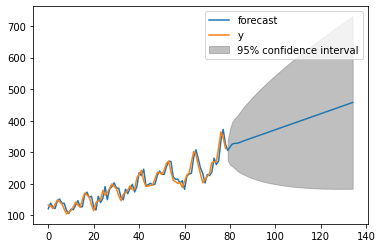

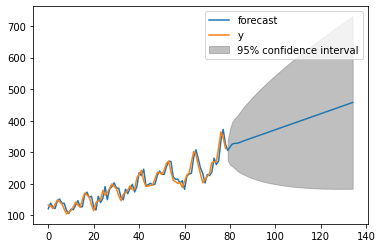

In [125]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=14)[0]
model_fit.plot_predict(1, 135)

In [126]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

45.428372855017955

# Combine train and test data and build final model

In [127]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

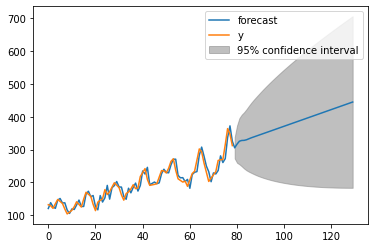

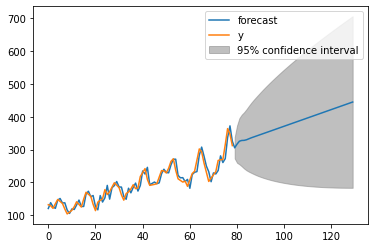

In [128]:
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,130)

In [129]:
forecast

array([305.45986444, 316.67758   , 325.61169883, 327.83318598,
       328.15480869, 329.92460544, 332.88752127, 335.8469267 ,
       338.41436085, 340.82834859, 343.31013433, 345.86889313])

#Summary with different forecasting methods

In [130]:
pd.DataFrame({'Holts':hwe_model_add_add.forecast(12),'ARIMA':forecast,'Mas':pred_new[:12].values})

,Holts,ARIMA,Mas
2002-12-31,272.905328,305.459864,325.605454
2003-01-31,280.764970,316.677580,364.450467
2003-02-28,278.356840,325.611699,368.556048
2003-03-31,270.568755,327.833186,361.227615
2003-04-30,261.492276,328.154809,358.497521
2003-05-31,256.795770,329.924605,406.802480
2003-06-30,256.344546,332.887521,449.235264
2003-07-31,253.596048,335.846927,442.034827
2003-08-31,260.534783,338.414361,403.735144
2003-09-30,262.088471,340.828349,355.412167


In [131]:
pd.DataFrame({'Model':['Holts','ARIMA','MAS'],"RMSE":[rmse_hwe_mul_add,rmse,rmse_Mult_add_sea]})

,Model,RMSE
0,Holts,20.583714
1,ARIMA,45.428373
2,MAS,13.188071




```
So Finally Multiplicative additive seasonality(MAS) will be the prefrerred technique because it has least RMSE value
```

# MAS will be prefered than any other in this analysis
